# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Irfan Arisani
- **Email:** arisaniirfan@gmail.com
- **ID Dicoding:** areisandi

## Menentukan Pertanyaan Bisnis

1. Stasiun mana yang memiliki kualitas udara terbaik dan terendah?
2. Bagaimana kualitas udara pada masing-masing bulan dan tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# advanced libraries
import gdown
import zipfile, glob
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [2]:
# download the datasets
url = 'https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr'
output = 'Air-quality-dataset.zip'
gdown.download(url, output, quiet=False)

# extract the datasets
datasetsZip = '/content/Air-quality-dataset.zip'
extractZip = zipfile.ZipFile(datasetsZip, 'r')
extractZip.extractall()
extractZip.close()

Downloading...
From: https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr
To: /content/Air-quality-dataset.zip
100%|██████████| 7.96M/7.96M [00:00<00:00, 62.1MB/s]


Kita memiliki beberapa datasets yang dibedakan berdasarkan masing-masing stasiun. Untuk memudahkan dalam analisis, mari Kita coba `gabung semua datasets menjadi satu kesatuan`!

In [3]:
# put all the datasets into a single array
dataset_path = '/content/PRSA_Data_20130301-20170228'
array_csv = np.array(glob.glob(dataset_path + "/*.*"))

# create a function to concatenate the array
def read_multiple_csv(array_csv):
  temp = pd.read_csv(array_csv[0])
  for i in range(1, len(array_csv)):
    temp2 = pd.read_csv(array_csv[i])
    temp = pd.concat([temp, temp2])
  return temp

# execute the function and save it to variable
df = read_multiple_csv(array_csv)

In [4]:
# see the head of data
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


### Assessing Data

In [5]:
# see the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


Berikut adalah penjelasan masing-masing fitur menurut sumber aslinya[<sup>[1]</sup>](https://www.researchgate.net/publication/319935212_Cautionary_tales_on_air-quality_improvement_in_Beijing)[<sup>[2]</sup>](https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data):
1. `No`: nomor baris
2. `year`: tahun pada baris ini
3. `month`: bulan pada baris ini
4. `day`: hari pada baris ini
5. `hour`: jam pada baris ini
6. `PM2.5`: konsentrasi PM2.5 (ug/m^3)
7. `PM10`: konsentrasi PM10 (ug/m^3)
8. `SO2`: konsentrasi SO2 (ug/m^3)
9. `NO2`: konsentrasi NO2 (ug/m^3)
10. `CO`: konsentrasi CO (ug/m^3)
11. `O3`: konsentrasi O3 (ug/m^3)
12. `TEMP`: suhu (degree Celsius)
13. `PRES`: tekanan (hPa)
14. `DEWP`: suhu titik embun (degree Celsius)
15. `RAIN`: endapan (mm)
16. `wd`: arah angin
17. `WSPM`: kecepatan angin (m/s)
18. `station`: nama stasiun pemantau kualitas udara

Menurut *AirNow*, terdapat 6 fitur untuk mengukur kualitas udara di antaranya:
- PM2.5
- PM10
- SO2
- NO2
- CO
- O3

Untuk memudahkan analisis, `fokus utama` notebook ini adalah dengan `melihat keenam parameter tersebut`.

In [6]:
# see the dataframe description
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [7]:
# see the number of data duplicates and null values
print('Terdapat sebanyak', df.duplicated().sum(), 'data duplikat.')
print('Adapun data yang kosong terdapat pada beberapa kolom sebagai berikut:')
print(df.isnull().sum())

Terdapat sebanyak 0 data duplikat.
Adapun data yang kosong terdapat pada beberapa kolom sebagai berikut:
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


### Cleaning Data

Setelah dilihat secara seksama, ternyata terdapat butir data yang tidak lengkap. Untuk itu, mari Kita `isi data kosong tersebut dengan data yang sering muncul pada masing-masing bulan dan stasiun`!

In [8]:
# get the months and stations as array then save it to new variables
array_month = df['month'].unique()
array_station = df['station'].unique()

# create a function to fill null values with the modes of given month and station
def modified_fill_na(df, array_month, array_station):
  # create a local function to fill null values with modes
  def fill_with_mode(df):
    mode_df = np.array(df.mode().iloc[0,:])
    for i in range(len(df.columns)):
      try:
        df.iloc[:,i].fillna(mode_df[i], inplace = True)
      except:
        pass
    return df

  # execute the fill_with_mode function for the first given expression, month 1 and station 1
  temp = df.loc[(df['month'] == array_month[0]) & (df['station'] == array_station[0])].copy()
  temp = fill_with_mode(temp)

  # execute the fill_with_mode function for the rest given expression,
  for i in range(len(array_month)):
    for j in range(len(array_station)):
      if i == 0 and j == 0:
        continue
      temp2 = df.loc[(df['month'] == array_month[i]) & (df['station'] == array_station[j])].copy()
      temp2 = fill_with_mode(temp2)
      temp = pd.concat([temp, temp2])

  # return as a new dataframe
  return temp

# execute the function, save it into new variable, and print the null values
mod_df = modified_fill_na(df, array_month, array_station)
print('Sekarang, tidak ada lagi data yang kosong seperti pada kolom berikut:')
print(mod_df.isnull().sum())

Sekarang, tidak ada lagi data yang kosong seperti pada kolom berikut:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Tingkat kerincian pada datasets ternyata sudah direkap hingga satuan jam. Untuk memudahkan analisis, maka Kita akan `mengubahnya menjadi satuan hari untuk setiap stasiun`. Dengan demikian, akan ada tambahan `satu fitur sebagai tanggal`.

Di sini Kita akan menggunakan `agregasi rata-rata` sebagai penyederhanaan jam ke hari, pendekatan ini memungkinkan Kita untuk:
- mengurangi *inacurrate values*
- mengurangi *outliers*

In [9]:
# simplifiy the dataframe from hour to day
temp = mod_df.groupby(by=['station', 'year', 'month', 'day'], as_index=False).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
    "TEMP": "mean",
    "PRES": "mean",
    "DEWP": "mean",
    "WSPM": "mean",
}).copy()

# save the date as a single feature
temp2 = []
for i in range(len(temp)):
    temp2.append(str(temp['year'].iloc[i]) +'-'+ str(temp['month'].iloc[i]) +'-'+ str(temp['day'].iloc[i]))
temp2 = np.array(temp2)
temp['date'] = temp2

# changed the current modified dataframe
mod_df = temp.copy()
mod_df.head()

,station,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,date
0,Aotizhongxin,2013,3,1,7.125000,10.750000,11.708333,22.583333,429.166667,63.875000,1.391667,1026.875000,-18.745833,3.254167,2013-3-1
1,Aotizhongxin,2013,3,2,30.750000,42.083333,36.625000,66.666667,824.916667,29.750000,0.616667,1026.850000,-15.937500,1.479167,2013-3-2
2,Aotizhongxin,2013,3,3,76.916667,120.541667,61.291667,81.000000,1620.625000,19.125000,5.566667,1014.608333,-12.316667,1.658333,2013-3-3
3,Aotizhongxin,2013,3,4,22.708333,44.583333,22.000000,45.375000,608.333333,53.750000,9.962500,1017.650000,-11.683333,2.404167,2013-3-4
4,Aotizhongxin,2013,3,5,148.875000,183.791667,93.875000,132.833333,2357.958333,68.458333,6.291667,1010.900000,-7.525000,1.129167,2013-3-5


In [10]:
# see the new dataframe info
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17532 entries, 0 to 17531
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  17532 non-null  object 
 1   year     17532 non-null  int64  
 2   month    17532 non-null  int64  
 3   day      17532 non-null  int64  
 4   PM2.5    17532 non-null  float64
 5   PM10     17532 non-null  float64
 6   SO2      17532 non-null  float64
 7   NO2      17532 non-null  float64
 8   CO       17532 non-null  float64
 9   O3       17532 non-null  float64
 10  TEMP     17532 non-null  float64
 11  PRES     17532 non-null  float64
 12  DEWP     17532 non-null  float64
 13  WSPM     17532 non-null  float64
 14  date     17532 non-null  object 
dtypes: float64(10), int64(3), object(2)
memory usage: 2.0+ MB


In [11]:
# see the new dataframe description
mod_df.describe()

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
count,17532.00000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000
mean,2014.66256,6.522930,15.729637,78.348889,103.414183,15.539755,49.881962,1191.756605,55.784716,13.531777,1010.754475,2.479973,1.729178
std,1.17723,3.448802,8.800343,68.188295,73.565452,18.000334,27.794314,948.463854,38.549610,10.830678,10.269608,13.545061,0.779205
min,2013.00000,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000,100.000000,1.000000,-15.683333,985.787500,-33.020833,0.170833
25%,2014.00000,4.000000,8.000000,29.364583,48.406250,3.708333,30.083333,591.666667,24.583333,3.000000,1002.329167,-9.210417,1.195833
50%,2015.00000,7.000000,16.000000,59.229167,86.687500,8.750000,45.125000,912.500000,50.229167,15.012500,1010.525000,2.764583,1.554167
75%,2016.00000,10.000000,23.000000,105.708333,136.291667,19.916667,64.291667,1437.500000,80.291667,23.479167,1018.937500,15.000000,2.058333
max,2017.00000,12.000000,31.000000,567.416667,584.666667,156.416667,193.333333,8904.166667,503.083333,32.366667,1041.025000,27.616667,7.237500


## Exploratory Data Analysis (EDA)

### Temperature Statistics

In [12]:
# see the temperature statistics for each stations
mod_df.groupby(by="station").agg({
    "TEMP": ["max", "min", "mean", "std"]
})

TEMP                                 
                     max        min       mean        std
station                                                  
Aotizhongxin   32.350000 -15.233333  13.581767  10.788999
Changping      32.366667 -14.958333  13.669135  10.789938
Dingling       32.366667 -14.958333  13.669135  10.789938
Dongsi         32.350000 -15.233333  13.668999  10.904013
Guanyuan       32.350000 -15.233333  13.581767  10.788999
Gucheng        32.029167 -14.291667  13.856625  10.697624
Huairou        31.075000 -15.683333  12.431847  11.013555
Nongzhanguan   32.350000 -15.233333  13.668999  10.904013
Shunyi         32.075000 -15.312500  13.375672  10.891601
Tiantan        32.350000 -15.233333  13.668999  10.904013
Wanliu         31.437500 -14.166667  13.426253  10.655567
Wanshouxigong  32.350000 -15.233333  13.782126  10.805754

### Air Pollution Statistics

In [13]:
# see the air pollution statistics (max, min, mean) for each stations
mod_df.groupby(by="station").agg({
    "PM2.5": ["max", "min", "mean"],
    "PM10": ["max", "min", "mean"],
    "SO2": ["max", "min", "mean"],
    "NO2": ["max", "min", "mean"],
    "CO": ["max", "min", "mean"],
    "O3": ["max", "min", "mean"],
})

PM2.5                             PM10            \
                      max       min       mean         max       min   
station                                                                
Aotizhongxin   512.291667  3.875000  80.845463  545.875000  6.000000   
Changping      433.458333  3.000000  69.728046  482.750000  5.625000   
Dingling       418.625000  3.000000  64.623970  441.625000  3.000000   
Dongsi         567.416667  3.000000  84.597710  584.666667  4.833333   
Guanyuan       536.083333  5.125000  81.768846  555.416667  7.291667   
Gucheng        519.750000  5.333333  82.567397  564.666667  6.333333   
Huairou        445.958333  3.000000  67.939853  506.708333  5.000000   
Nongzhanguan   492.958333  3.000000  83.455767  505.708333  6.000000   
Shunyi         514.625000  3.000000  77.810167  515.333333  5.000000   
Tiantan        499.333333  5.333333  80.838661  537.125000  7.208333   
Wanliu         481.291667  4.291667  82.556494  514.375000  6.333333   
Wanshouxigong  536.625000  3.000000  83.454298  560.541667  6.041667   

                                  SO2                              NO2  \
                     mean         max       min       mean         max   
station                                                                  
Aotizhongxin   108.256194  134.083333  2.000000  16.965895  170.958333   
Changping       93.448058  137.958333  1.416667  14.734881  150.416667   
Dingling        82.392922   92.666667  1.291667  11.546671  150.041667   
Dongsi         109.057389  131.375000  1.000000  18.223095  174.000000   
Guanyuan       108.396022  145.291667  1.666667  17.383689  169.125000   
Gucheng        118.019365  118.250000  1.583333  15.175121  188.291667   
Huairou         89.838952  136.375000  1.083333  11.838667  123.208333   
Nongzhanguan   107.981083  145.083333  1.000000  18.486886  186.541667   
Shunyi          97.397251  156.416667  1.083333  13.144325  141.625000   
Tiantan        105.111416  126.666667  1.083333  13.988480  170.666667   
Wanliu         109.753434  149.416667  2.000000  18.123444  193.333333   
Wanshouxigong  111.318110  137.416667  1.541667  16.865908  175.875000   

                                             CO                           \
                    min       mean          max         min         mean   
station                                                                    
Aotizhongxin   6.833333  58.555038  7487.500000  158.333333  1221.447011   
Changping      6.833333  43.854329  6820.833333  125.000000  1120.786105   
Dingling       2.000000  26.740826  7695.833333  100.000000   872.804728   
Dongsi         7.541667  52.656926  8166.666667  137.500000  1264.927361   
Guanyuan       6.041667  57.446555  7870.833333  116.666667  1230.540925   
Gucheng        4.458333  55.159779  8904.166667  108.333333  1285.987081   
Huairou        2.083333  31.364750  7216.666667  133.333333   995.741501   
Nongzhanguan   9.083333  57.623232  7795.833333  100.000000  1293.607375   
Shunyi         5.625000  42.801872  7116.666667  100.000000  1137.379820   
Tiantan        3.791667  52.633128  8570.833333  200.000000  1270.069530   
Wanliu         8.666667  64.851765  8029.166667  100.000000  1268.584389   
Wanshouxigong  8.625000  54.895340  8783.333333  145.833333  1339.203428   

                       O3                       
                      max       min       mean  
station                                         
Aotizhongxin   191.166667  1.000000  53.686081  
Changping      186.916667  2.000000  57.355250  
Dingling       207.333333  1.000000  67.645373  
Dongsi         503.083333  1.541667  56.165124  
Guanyuan       174.000000  1.000000  53.993008  
Gucheng        182.041667  2.000000  56.686022  
Huairou        185.083333  2.000000  57.926577  
Nongzhanguan   185.500000  1.125000  57.718844  
Shunyi         171.375000  2.000000  52.942116  
Tiantan        200.666667  1.208333  54.686420  
Wanliu         172.666667  1.000000  46.056973  
W

In [14]:
# see the average air pollution statistics for each year
mod_df.groupby(by='year', as_index=False).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
})

,year,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,79.155053,102.234182,19.720561,51.642028,1094.291746,55.017849
1,2014,83.501837,114.090981,20.234872,53.292801,1228.521689,56.236078
2,2015,78.189391,102.539384,12.852972,47.895086,1243.852740,58.293243
3,2016,70.596217,93.600486,9.659760,45.895928,1123.903309,56.130227
4,2017,91.368938,109.772893,17.907721,56.671139,1568.438089,39.307498


In [15]:
# see the average air pollution statistics for each year and divided by year
mod_df.groupby(by=['station', 'year', 'month'], as_index=False).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
})

,station,year,month,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,2013,3,110.092742,143.814516,44.543858,74.603027,1375.653226,46.755592
1,Aotizhongxin,2013,4,62.751389,108.204167,24.662618,52.848596,902.722222,46.982549
2,Aotizhongxin,2013,5,84.848118,140.778226,30.442204,61.016129,859.630376,69.887648
3,Aotizhongxin,2013,6,105.795833,128.716667,14.408899,72.367417,1094.470833,66.709500
4,Aotizhongxin,2013,7,68.911290,85.272849,9.273135,55.052962,809.263441,70.671519
...,...,...,...,...,...,...,...,...,...
571,Wanshouxigong,2016,10,82.873656,94.034946,3.298387,60.857527,1243.951613,20.122312
572,Wanshouxigong,2016,11,106.344444,136.377778,10.468056,71.477778,1812.638889,13.944444
573,Wanshouxigong,2016,12,156.427419,168.801075,17.340054,89.650538,2601.075269,14.978495
574,Wanshouxigong,2017,1,131.864247,149.256720,18.532258,71.060484,2063.306452,27.853495


## Visualization & Explanatory Analysis

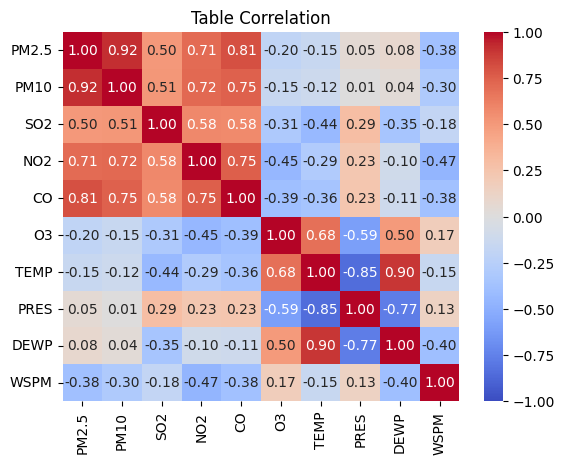

In [16]:
# check the correlation visualization
plt.title('Table Correlation')
sns.heatmap(mod_df.iloc[:,4:].corr(), annot=True,
            fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Dapat dilihat bahwa fitur `PM2.5, PM10, SO2, NO2, CO` memiliki `korelasi positif yang kuat`. <br>Berbeda dengan fitur `O3` yang memiliki `korelasi negatif lemah hingga sedang` pada `lima fitur utama lainnya`.

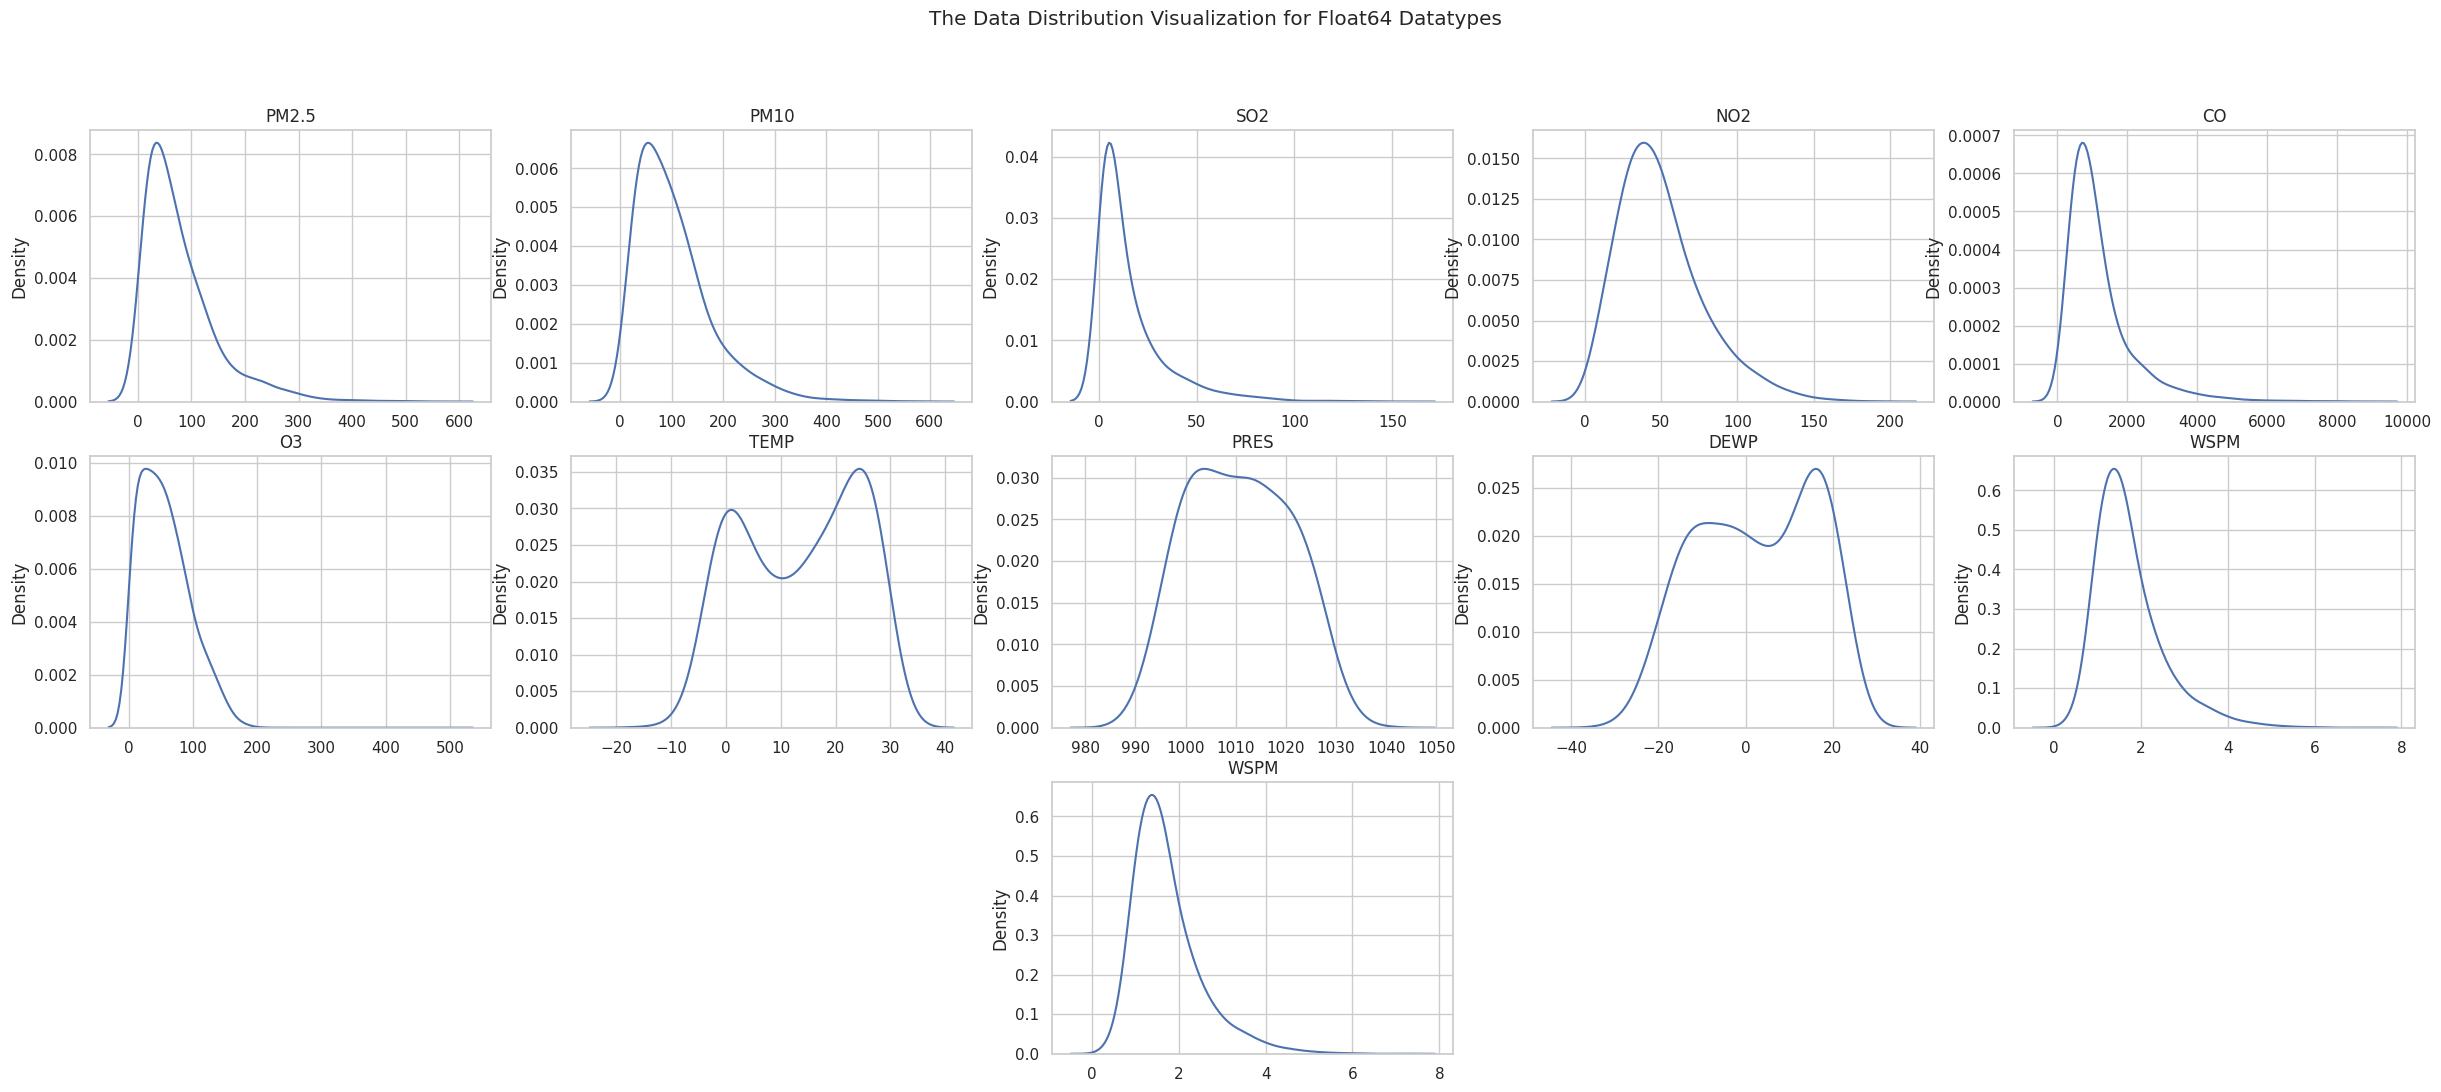

In [17]:
# create a distribution visualization
sns.set_theme(style = 'whitegrid')
temp = list(mod_df.select_dtypes(include='float64'))
rows = 3
columns = 5
num_features = 0

# canvas configurations
fig, axs = plt.subplots(rows, columns, figsize = (30,12))
fig.suptitle('The Data Distribution Visualization for Float64 Datatypes')

# do the visualization
for i in range(rows):
  for j in range(columns):
    try:
      if num_features >= 10:
        axs[i, 2].set_title(temp[-1])
        data = mod_df[temp[-1]]
        sns.kdeplot(ax = axs[i, 2], x = np.array(data), bw_adjust = 2)
        break
      data = mod_df[temp[num_features]]
      sns.kdeplot(ax = axs[i, j], x = np.array(data), bw_adjust = 2)
      axs[i, j].set_title(temp[num_features])
    except:
      pass
    num_features += 1

for i in range(5):
  if i == 2:
    continue
  axs[2, i].set_axis_off()

plt.show()

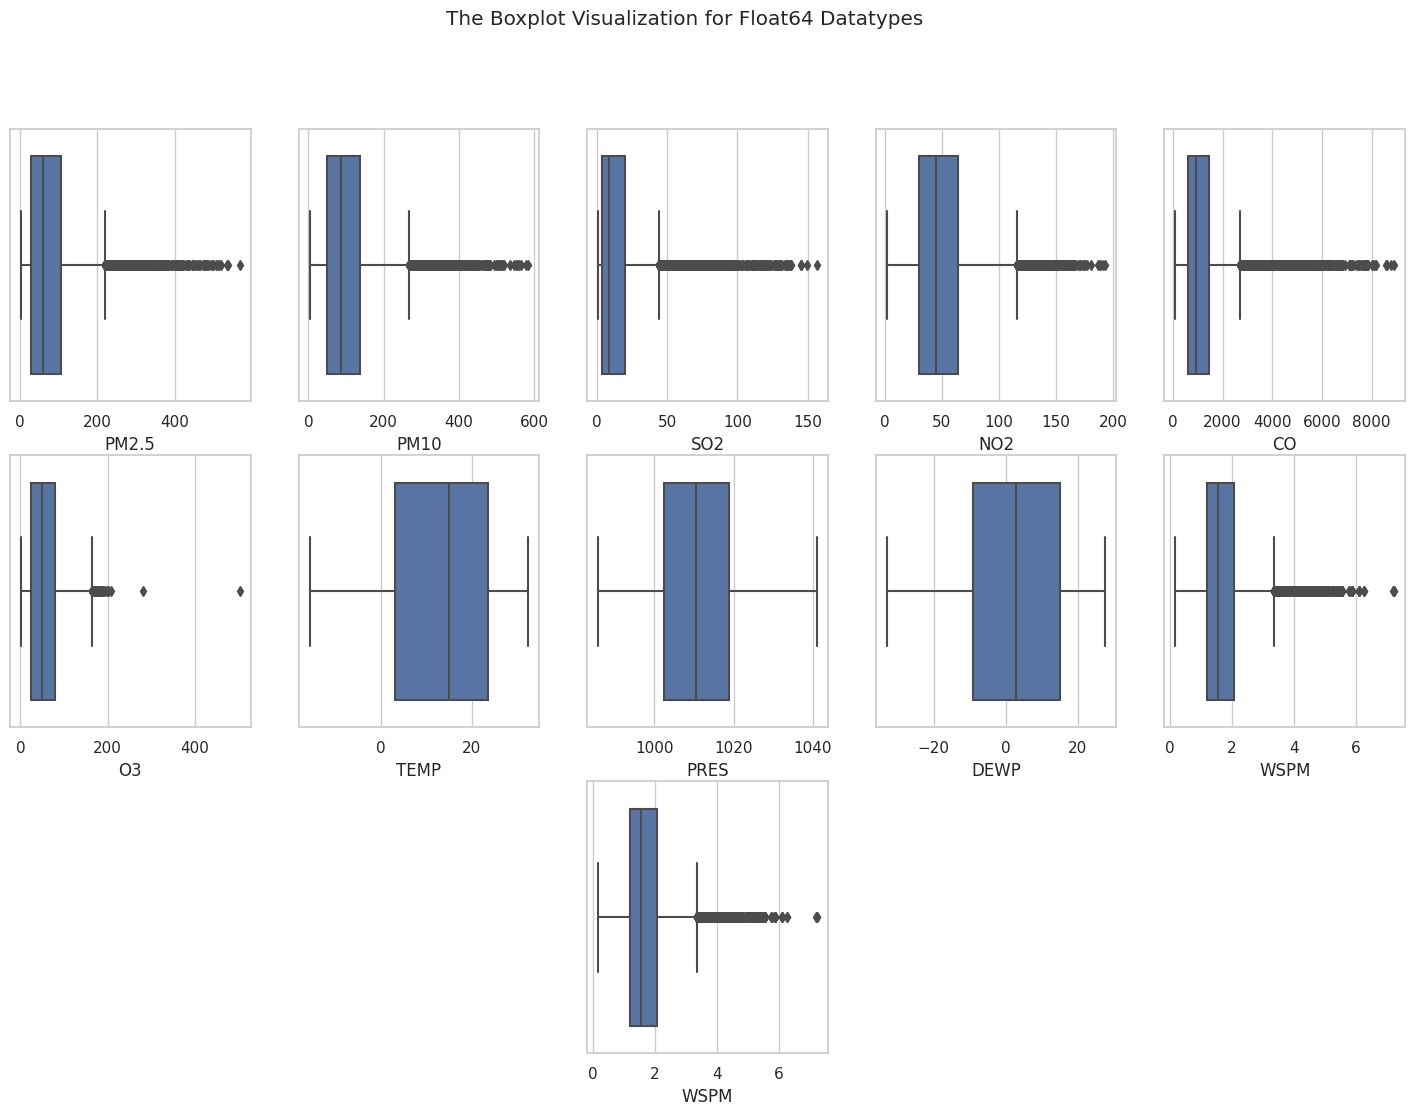

In [18]:
# also create a boxplot visualization
num_features = 0

# canvas configurations
fig, axs = plt.subplots(rows, columns, figsize = (18, 12))
fig.suptitle('The Boxplot Visualization for Float64 Datatypes')

# do the visualization
for i in range(rows):
  for j in range(columns):
    try:
      if num_features >= 10:
        # axs[i, 2].set_title(temp[-1])
        sns.boxplot(ax = axs[i, 2], x = mod_df[temp[-1]])
        break
      sns.boxplot(ax = axs[i, j], x = mod_df[temp[num_features]])
      # axs[i, j].set_title(temp[num_features])
    except:
      pass
    num_features += 1

for i in range(5):
  if i == 2:
    continue
  axs[2, i].set_axis_off()

plt.show()

Dapat dilihat bahwa pada visualisasi di atas bahwa `visualisasi distribusi mengalami skewness`. Hal tersebut bisa terjadi `terdapat banyak outliers`, terutama pada `keenam fitur utama`.<br>Untuk itu, Kita akan <u>membuat metode IQR untuk mendeteksi *outliers* dan menggantinya dengan nilai yang sering muncul</u>.

In [19]:
# create inter quartile range procedure
def iqr_with_mode(DataFrame):
  for i in DataFrame:
    try:
      # calculate the upper and lower limits
      Q1 = DataFrame[i].quantile(0.25)
      Q3 = DataFrame[i].quantile(0.75)
      IQR = Q3 - Q1
      lower = Q1 - 1.5*IQR
      upper = Q3 + 1.5*IQR

      # create arrays of boolean values indicating the outlier rows
      lower_array = np.where(DataFrame[i]<=lower)[0]
      upper_array = np.where(DataFrame[i]>=upper)[0]

      # detect the outliers and replacing with mode
      mode = DataFrame[i].mode()[0]
      DataFrame.loc[lower_array, i] = mode
      DataFrame.loc[upper_array, i] = mode
    except:
      pass

# execute the procedure
iqr_with_mode(mod_df)

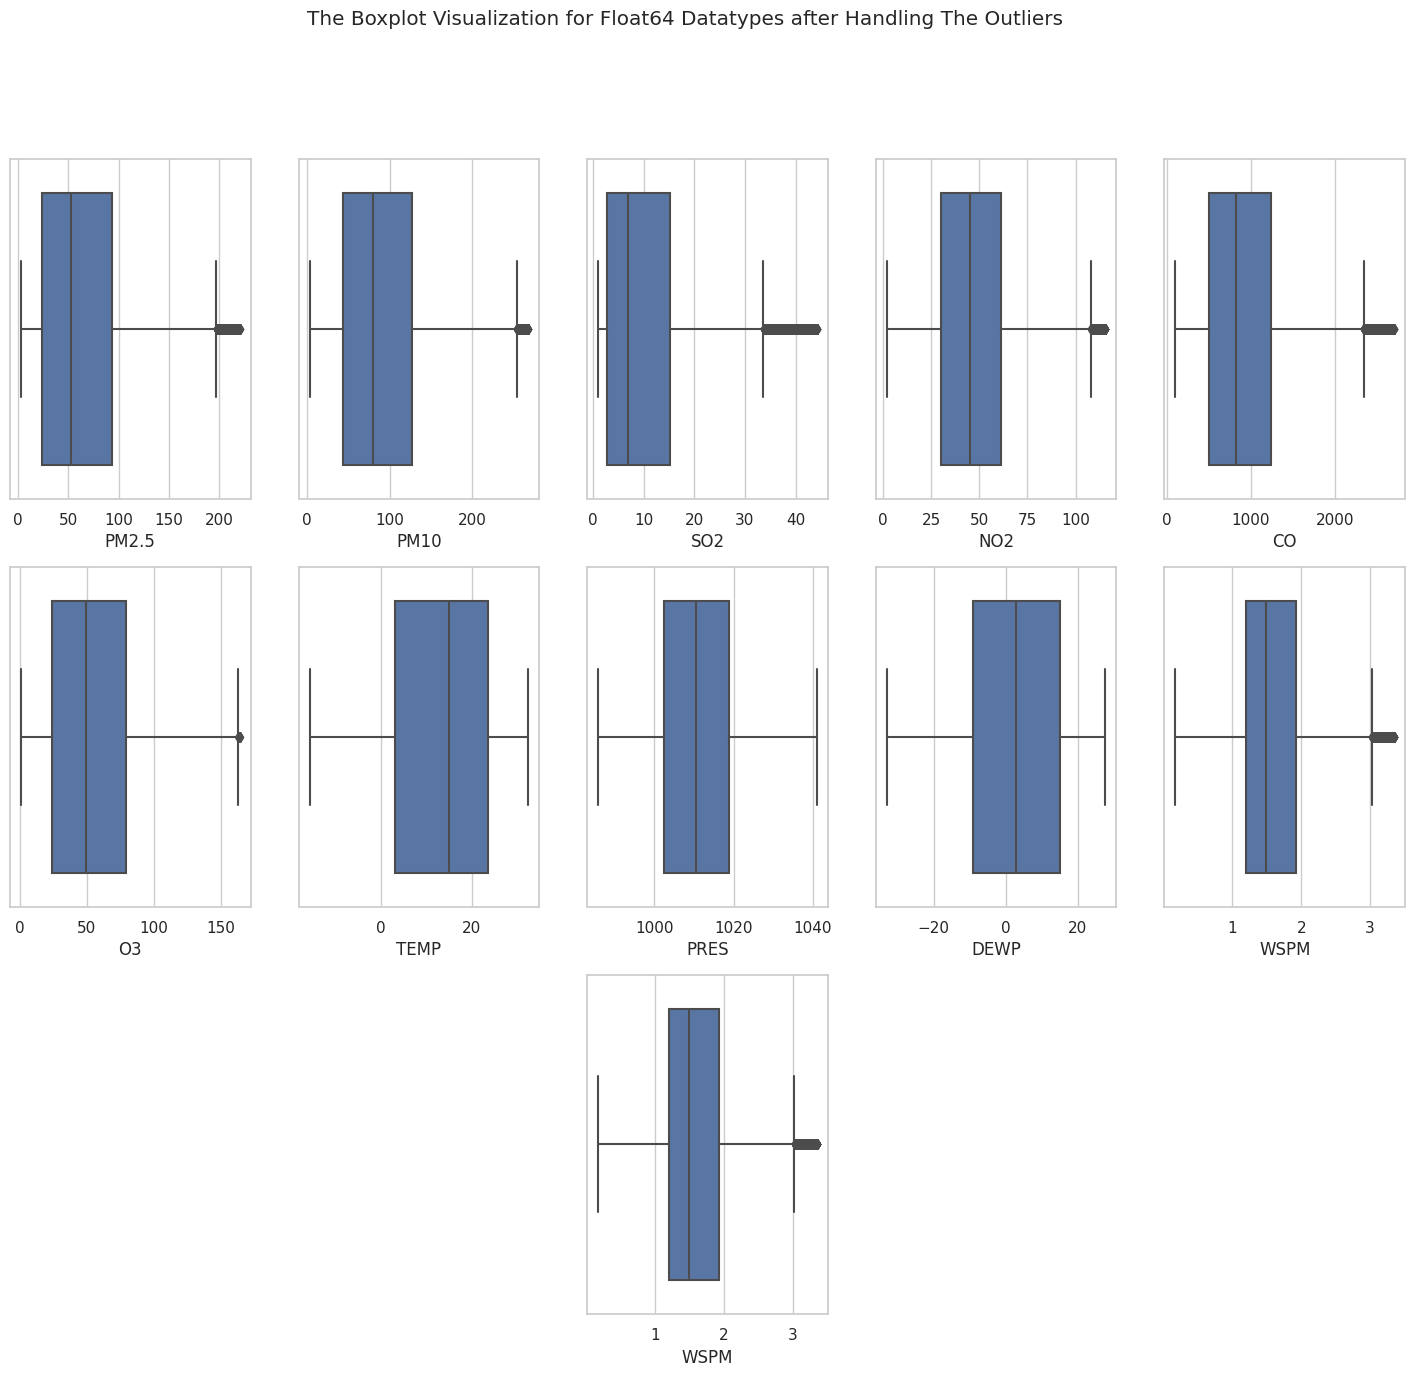

In [20]:
# also create a boxplot visualization
num_features = 0

# canvas configurations
fig, axs = plt.subplots(rows, columns, figsize = (18, 15))
fig.suptitle('The Boxplot Visualization for Float64 Datatypes after Handling The Outliers')

# do the visualization
for i in range(rows):
  for j in range(columns):
    try:
      if num_features >= 10:
        # axs[i, 2].set_title(temp[-1])
        sns.boxplot(ax = axs[i, 2], x = mod_df[temp[-1]])
        break
      sns.boxplot(ax = axs[i, j], x = mod_df[temp[num_features]])
      # axs[i, j].set_title(temp[num_features])
    except:
      pass
    num_features += 1

for i in range(5):
  if i == 2:
    continue
  axs[2, i].set_axis_off()

plt.show()

### Pertanyaan 1: Stasiun mana yang memiliki kualitas udara terbaik dan terendah?

Guna menghitung skor kualitas udara, sejatinya sudah ada tekniknya tersendiri[<sup>[3]</sup>](https://www.airnow.gov/publications/air-quality-index/technical-assistance-document-for-reporting-the-daily-aqi/). Pada notebook kali ini Kita akan mencoba menghitung skor kualitas udara secara sederhana `dengan rumus Kita sendiri`, namun tetap menyinggung pada rumus aslinya.<br>Rumus sederhana akan direpresentasikan seperti tabel berikut:

|| Good<br>(30 pts) | Moderate<br>(20 pts) | Sensitive<br>(15 pts) | Unhealthy<br>(10 pts) | Very Unhealthy<br>(5 pts) | Hazardous<br>(-10 pts) |
| --- | --- | --- | --- | --- | --- | --- |
| PM2.5 | < 22 | < 44 | < 66 | < 88 | < 132 | > 132 |
| PM10 | < 27 | < 54 | < 80 | < 107 | < 161 | > 161 |
| SO2 | < 4 | < 9 | < 13 | < 18 | < 26 | > 26 |
| NO2 | < 12 | < 23 | < 35 | < 46 | < 69 | > 69  |
| CO | < 270 | < 541 | < 811 | < 1082 | < 1622 | > 1622  |
| O3 | < 16 | < 33 | < 49 | < 65 | < 98 | > 98 |


In [21]:
# create a funtion to calculate air quality score
def calculate_air_score(DataFrame):
  # initial variable
  arr = []
  main_feat = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

  for i in range(len(DataFrame)):
    # set score as zero
    pts = 0
    for j in range(len(main_feat)):
      var = DataFrame[main_feat[j]][i]
      # pm2.5 score convertion
      if j == 0:
        if var < 22:
          pts += 30
        elif var < 44:
          pts += 20
        elif var < 66:
          pts += 15
        elif var < 88:
          pts += 10
        elif var < 132:
          pts += 5
        else:
          pts -= 10

      # pm10 score convertion
      if j == 1:
        if var < 27:
          pts += 30
        elif var < 54:
          pts += 20
        elif var < 80:
          pts += 15
        elif var < 107:
          pts += 10
        elif var < 161:
          pts += 5
        else:
          pts -= 10

      # so2 score convertion
      if j == 2:
        if var < 4:
          pts += 30
        elif var < 9:
          pts += 20
        elif var < 13:
          pts += 15
        elif var < 18:
          pts += 10
        elif var < 26:
          pts += 5
        else:
          pts -= 10

      # no2 score convertion
      if j == 3:
        if var < 12:
          pts += 30
        elif var < 23:
          pts += 20
        elif var < 35:
          pts += 15
        elif var < 46:
          pts += 10
        elif var < 69:
          pts += 5
        else:
          pts -= 10

      # co score convertion
      if j == 4:
        if var < 270:
          pts += 30
        elif var < 541:
          pts += 20
        elif var < 811:
          pts += 15
        elif var < 1082:
          pts += 10
        elif var < 1622:
          pts += 5
        else:
          pts -= 10

      # o3 score convertion
      if j == 5:
        if var < 16:
          pts += 30
        elif var < 33:
          pts += 20
        elif var < 49:
          pts += 15
        elif var < 65:
          pts += 10
        elif var < 98:
          pts += 5
        else:
          pts -= 10

    # add all points into a single list
    arr.append(pts)

  # return score list as numpy array
  return np.array(arr)

# execute the function and save it into new feature in dataframe
score = calculate_air_score(mod_df)
mod_df['air_quality_score'] = score
mod_df.head()

,station,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,date,air_quality_score
0,Aotizhongxin,2013,3,1,7.125000,10.750000,11.708333,22.583333,429.166667,63.875000,1.391667,1026.875000,-18.745833,3.254167,2013-3-1,125
1,Aotizhongxin,2013,3,2,30.750000,42.083333,36.625000,66.666667,824.916667,29.750000,0.616667,1026.850000,-15.937500,1.479167,2013-3-2,65
2,Aotizhongxin,2013,3,3,76.916667,120.541667,2.000000,81.000000,1620.625000,19.125000,5.566667,1014.608333,-12.316667,1.658333,2013-3-3,60
3,Aotizhongxin,2013,3,4,22.708333,44.583333,22.000000,45.375000,608.333333,53.750000,9.962500,1017.650000,-11.683333,2.404167,2013-3-4,80
4,Aotizhongxin,2013,3,5,148.875000,183.791667,2.000000,58.000000,2357.958333,68.458333,6.291667,1010.900000,-7.525000,1.129167,2013-3-5,10


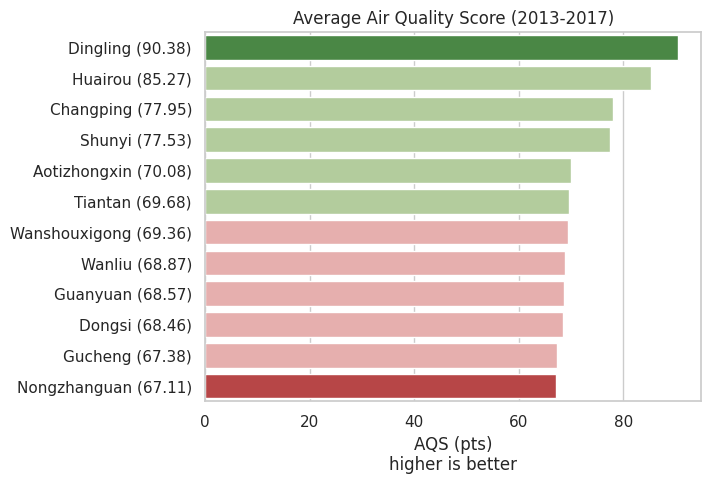

In [22]:
# create mod_df group by station with mean aggregation
temp = mod_df.groupby(by='station', as_index=False).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
    "air_quality_score": "mean",
}).sort_values('air_quality_score', ascending = False)

# add each stasion with air quality score
stations = np.array(temp['station'])
scores = np.array(temp['air_quality_score'])
st_scr = []
for i in range(len(temp)):
  st_scr.append(stations[i] +' ('+ str(round(scores[i], 2)) +')')

# create the visualization for question 1
colors = ['#40923A', '#B3D495', '#B3D495', '#B3D495', '#B3D495', '#B3D495',
          '#EFA6A5', '#EFA6A5', '#EFA6A5', '#EFA6A5', '#EFA6A5', '#CA3335']
sns.barplot(x = temp['air_quality_score'],
            y = st_scr,
            orient = 'h',
            palette = colors)

plt.title('Average Air Quality Score (2013-2017)')
plt.xlabel('AQS (pts)\nhigher is better')
plt.show()

In [23]:
# RUN THIS CELL ON GOOGLE COLAB OR KAGGLE NOTEBOOK!
# create the interactive visualization for question 1
fig = px.bar(temp,
             x='air_quality_score',
             y='station',
             color='station',
             orientation='h',
             title='Average Air Quality Score (2013 - 2017)',
             labels={'air_quality_score':'AQS (pts)<br>higher is better'},
             width = 800)
fig.show()

Dari visualisasi di atas dapat Kita petik wawasan bahwa sepanjang tahun `2013 sampai 2017`, daerah di sekitaran `stasiun Dingling` adalah `daerah terbersih`.<br>Sedangkan `peringkat terakhir` dalam hal kualitas udara adalah daerah di sekitaran `stasiun Nongzhanguan`.

### Pertanyaan 2: Bagaimana kualitas udara pada masing-masing bulan dan tahun?

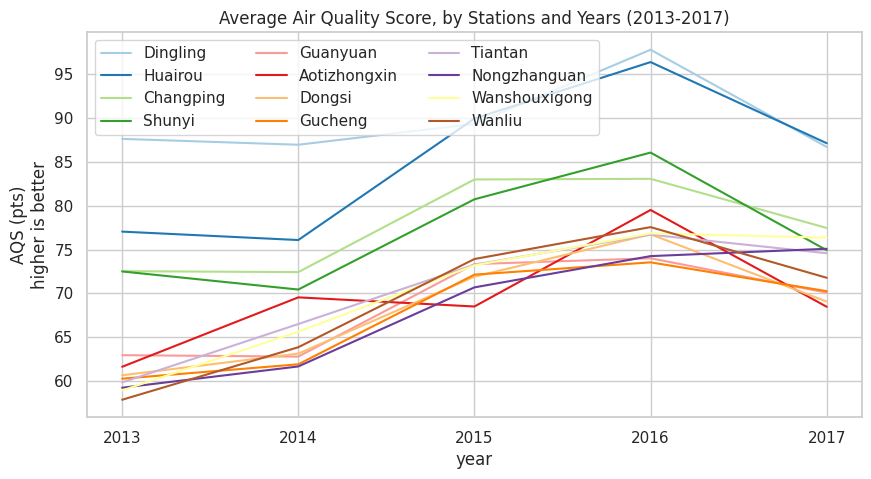

In [24]:
# create mod_df group by station, year with mean aggregation
temp2 = mod_df.groupby(by=['station', 'year'], as_index=False).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
    "air_quality_score": "mean",
}).sort_values(['year', 'air_quality_score'], ascending = [True, False])

# create the visualization for question 2a
plt.figure(figsize=(10, 5))
sns.lineplot(x = temp2['year'],
             y = temp2['air_quality_score'],
             hue = temp2['station'],
             palette = 'Paired')

plt.title('Average Air Quality Score, by Stations and Years (2013-2017)')
plt.ylabel('AQS (pts)\nhigher is better')
plt.xticks(temp2['year'].unique())
plt.legend(ncol = 3)
plt.show()

In [25]:
# RUN THIS CELL ON GOOGLE COLAB OR KAGGLE NOTEBOOK!
# create the interactive visualization for question 2a
fig = px.line(temp2,
              x='year',
              y='air_quality_score',
              color='station',
              title='Average Air Quality Score, by Stations and Years (2013 - 2017)',
              labels={'air_quality_score':'AQS (pts)<br>higher is better'},
              width = 900)

fig.update_xaxes(tickmode = 'array',
                 tickvals = temp2['year'].unique(),
                 ticktext = temp2['year'].unique())

fig.show()

Jika dilihat dalam satuan tahun, grafik skor kualitas udara pada masing-masing stasiun `mengalami fluktuatif`, yakni mengalami kenaikan skor menuju tahun 2016 dan penurunan pada tahun setelahnya.

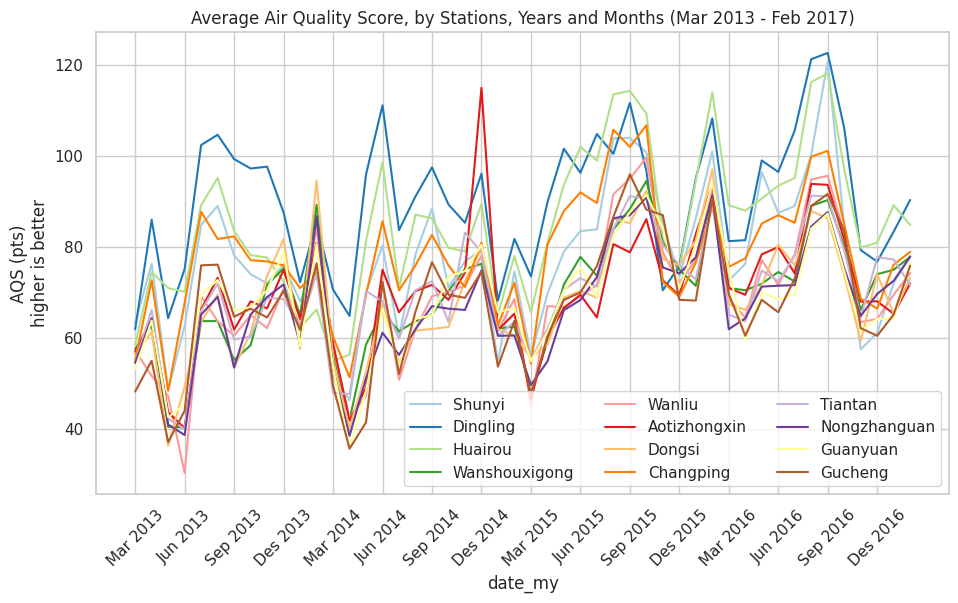

In [26]:
# create mod_df group by station, year with mean aggregation
temp2 = mod_df.groupby(by=['station', 'year', 'month'], as_index=False).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
    "air_quality_score": "mean",
}).sort_values(['year', 'month', 'air_quality_score'], ascending = [True, True, False])

# save the month-year as a single feature
temp3 = []
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des']
for i in range(len(temp2)):
    mon = temp2['month'].iloc[i]
    for j in range(1, len(months)+1):
        if mon == j:
            mon_as = months[j-1]
            break
    temp3.append(mon_as + ' ' + str(temp2['year'].iloc[i]))
temp3 = np.array(temp3)
temp2['date_my'] = temp3

# create the visualization for question 2b
plt.figure(figsize=(11, 6))
sns.lineplot(x = temp2['date_my'],
             y = temp2['air_quality_score'],
             hue = temp2['station'],
             palette = 'Paired')

plt.title('Average Air Quality Score, by Stations, Years and Months (Mar 2013 - Feb 2017)')
plt.ylabel('AQS (pts)\nhigher is better')
plt.xticks(temp2['date_my'].unique()[::3], rotation=45)
plt.legend(ncol = 3)
plt.show()

In [27]:
# RUN THIS CELL ON GOOGLE COLAB OR KAGGLE NOTEBOOK!
# create the interactive visualization for question 2a
fig = px.line(temp2,
              x='date_my',
              y='air_quality_score',
              color='station',
              title='Average Air Quality Score, by Stations, Years and Months (Mar 2013 - Feb 2017)',
              labels={'air_quality_score':'AQS (pts)<br>higher is better'},
              width = 900)

fig.update_xaxes(tickmode = 'array',
                 tickvals = temp2['date_my'].unique()[::3],
                 tickangle=-45)

fig.show()

Dapat dilihat pada visualisasi di atas bahwa setiap tahun, kualitas udara mengalami penurunan pada `kurang lebih di bulan Maret, sebelum atau sesudahnya`.

In [28]:
# save the dataframe as a csv file
mod_df.to_csv('main_data.csv', index = False)

## Conclusion

### Kesimpulan Pertanyaan 1

Terdapat beberapa wawasan yang dapat dipetik oleh masing-masing pihak:
1. Untuk Masyarakat
- `Pentingnya menjaga kebersihan daerah dari polusi`, khususnya masyarakat yang tinggal di daerah dengan skor kualitas di bawah 60.
2. Untuk Pemerintah
- `Giatkan aturan tentang pentingnya menjaga kebersihan`, seperti melakukan sosialisasi untuk menggunakan masker.
3. Untuk Perusahaan
- `Gencarkan pemasaran pada daerah tertentu`, yakni pada daerah yang masih memiliki skor kualitas udara yang rendah.

### Kesimpulan Pertanyaan 2

Adapun untuk kesimpulan pada pertanyaan 2 yakni:
1. Untuk Masyarakat
- `Gunakan masker pada musim yang rawan`, khususnya ketika memasuki bulan Maret.
2. Untuk Pemerintah
- `Berlakukan kebijakan WFO pada musim yang rawan`, guna mengurangi aktivitas keramaian di sekitaran bulan Maret.
3. Untuk Perusahaan
- `Perbanyak pasokan alat kebersihan dan kesehatan pada musim yang rawan`, seperti stok masker sebelum memasuki bulan Maret.

## References

- [1] [Cautionary tales on air-quality improvement in Beijing](https://www.researchgate.net/publication/319935212_Cautionary_tales_on_air-quality_improvement_in_Beijing)
- [2] [Beijing Multi-Site Air-Quality Data](https://www.researchgate.net/publication/319935212_Cautionary_tales_on_air-quality_improvement_in_Beijing)
- [3] [Technical Assistance Document for the Reporting of Daily Air Quality](https://www.airnow.gov/publications/air-quality-index/technical-assistance-document-for-reporting-the-daily-aqi/)